# Mercedes-Benz Greener Manufacturing - Analysis

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style(style='darkgrid')

## Reading Train data and Test data

In [3]:
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')

In [4]:
training_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
testing_data.head(7)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
5,8,y,aa,ai,e,d,x,g,s,0,...,1,0,0,0,0,0,0,0,0,0
6,10,x,b,ae,d,d,x,d,y,0,...,0,0,0,0,0,1,0,0,0,0


## Exploring the structure of data

In [6]:
print("No of training observations : " + str(training_data.shape[0]))
print("No of features : " + str(training_data.shape[1] - 2))

print("No of testing observations : " + str(testing_data.shape[0]))

No of training observations : 4209
No of features : 376
No of testing observations : 4209


## 1.Checking if any column contain 0 variance

In [7]:
training_data.var()[(training_data.var() == 0)].index

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

In [8]:
testing_data.var()[(training_data.var() == 0)].index

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

Removing / Droping those columns with 0 variance

In [9]:
training_data.drop(labels=list(training_data.var()[
    (training_data.var() == 0)].index) , axis=1 ,
                   inplace=True)
testing_data.drop(labels=list(training_data.var()[
    (training_data.var() == 0)].index) , axis=1 ,
                  inplace=True)

## 2.Checking if any column contains null / unique values

In [10]:
training_data.isnull().any().any()

False

In [11]:
training_data.isnull().any().any()

False

Therefore no column contains null value

In [12]:
print("Total nummber of columns : " + str(training_data.shape[1]))
print("Columns with True/False observations (i.e only 2 unique values) : " 
      + str(len(training_data.nunique()[training_data.nunique() == 2])))

Total nummber of columns : 366
Columns with True/False observations (i.e only 2 unique values) : 356


In [13]:
training_data.drop(
                  labels=['y' , 'ID'] ,
                  axis = 1
                  ).nunique()[training_data.drop(
                                                labels=['y' , 'ID'] ,
                                                axis = 1
                                                ).nunique() > 2]

X0    47
X1    27
X2    44
X3     7
X4     4
X5    29
X6    12
X8    25
dtype: int64

**So, there are 8 columns having more than 2 unique values**

Therefore we have to implement label encoders for these 8 columns

In [14]:
training_data.columns[2:10]

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

## 3.Applying Label Encoders

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
def check_column(column_name) :
    for item in training_data[column_name].unique() :
        if item not in testing_data[column_name].unique() :
            return False
    return True

In [17]:
for i in range(2,10) :
    column_name = training_data.columns[i]
    print(column_name + " : " + str(check_column(column_name)))

X0 : False
X1 : True
X2 : False
X3 : True
X4 : True
X5 : False
X6 : True
X8 : True


So X0 , X2 , X5 should be encoded as whole

In [18]:
X0_train = training_data.X0
X0_test = testing_data.X0

X0_label_encoder = LabelEncoder()
X0_label_encoder.fit(np.concatenate((X0_train.values , X0_test.values)))

X2_train = training_data.X2
X2_test = testing_data.X2

X2_label_encoder = LabelEncoder()
X2_label_encoder.fit(np.concatenate((X2_train.values , X2_test.values)))

X5_train = training_data.X5
X5_test = testing_data.X5

X5_label_encoder = LabelEncoder()
X5_label_encoder.fit(np.concatenate((X5_train.values , X5_test.values)))

LabelEncoder()

In [19]:
training_data.X0 = X0_label_encoder.transform(training_data.X0)
training_data.X2 = X2_label_encoder.transform(training_data.X2)
training_data.X5 = X5_label_encoder.transform(training_data.X5)

testing_data.X0 = X0_label_encoder.transform(testing_data.X0)
testing_data.X2 = X2_label_encoder.transform(testing_data.X2)
testing_data.X5 = X5_label_encoder.transform(testing_data.X5)

In [20]:
def ret_label_encoder(column_name) :
    label_encoder = LabelEncoder()
    label_encoder.fit(training_data[column_name])
    return label_encoder

In [21]:
column_names = ['X1' ,'X3' , 'X4' , 'X6' , 'X8']
encoders = {
    'X0' : X0_label_encoder ,
    'X2' : X2_label_encoder ,
    'X5' : X5_label_encoder
}


for column in column_names : 
    encoders.update({ column : ret_label_encoder(column) })

In [22]:
for column in column_names :
    training_data[column] = encoders[column].transform(training_data[column])
    testing_data[column] = encoders[column].transform(testing_data[column])

In [23]:
training_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,37,23,20,0,3,27,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,37,21,22,4,3,31,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,24,24,38,2,3,30,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,24,21,38,5,3,30,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,24,23,38,5,3,14,3,13,...,0,0,0,0,0,0,0,0,0,0


In [24]:
testing_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,24,23,38,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,46,3,9,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,24,23,19,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,24,13,38,5,3,32,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,49,20,19,2,3,31,8,12,0,...,1,0,0,0,0,0,0,0,0,0


Therefore all data have been encoded and encoders are kept in dictionary encoders

## 4. Dimensionality Reduction

In [25]:
X_train = training_data.drop(labels=['ID' , 'y'] , axis=1)
y_train = training_data.y

X_test = testing_data.drop(labels=['ID'] , axis=1)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

standard_scaler = StandardScaler()
pca = PCA(n_components=80)

In [27]:
standard_scaler.fit(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
scaled_data = standard_scaler.transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [29]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=80, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
reduced_data = pca.transform(X_train)

In [31]:
reduced_data.shape

(4209, 80)

## 5. Performing XGBoost

In [32]:
from xgboost import XGBRegressor 

In [33]:
xgboost_regressor = XGBRegressor(n_estimators=300 , learning_rate=0.5)

In [34]:
xgboost_regressor.fit(reduced_data,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[03:03:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
print("MSE = " + str(mean_squared_error(y_train , xgboost_regressor.predict(reduced_data))))

MSE = 10.638177388445852


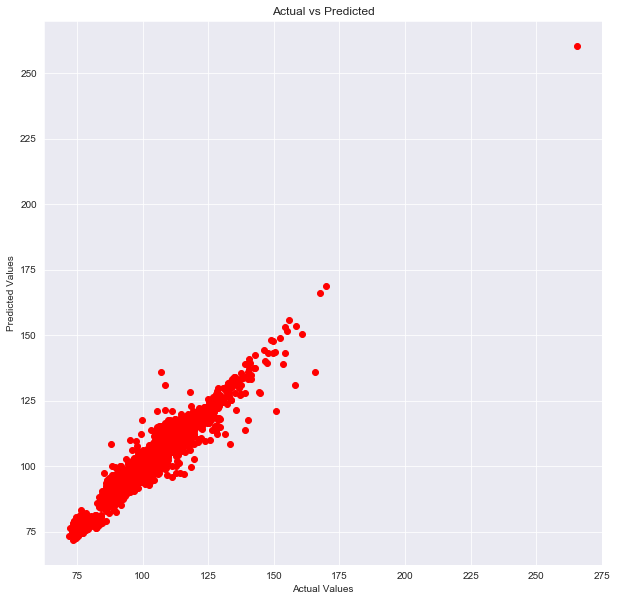

In [37]:
plt.figure(figsize=(10,10))
plt.title("Actual vs Predicted")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.scatter(y_train , xgboost_regressor.predict(reduced_data) ,  c = 'red')

plt.show()

Predicting Test Values

In [38]:
test_standard_scaler = StandardScaler()

In [39]:
X_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,24,23,38,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,46,3,9,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,24,23,19,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,24,13,38,5,3,32,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,49,20,19,2,3,31,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [40]:
scaled_test_data = test_standard_scaler.fit_transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [41]:
test_reduced_data = pca.fit_transform(scaled_test_data)

In [42]:
test_reduced_data.shape

(4209, 80)

## Predictions of Test Data

In [43]:
xgboost_regressor.predict(test_reduced_data)

array([163.42642, 153.65556, 148.67099, ..., 120.33546, 135.81264,
       107.35823], dtype=float32)